In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

Loading Data

In [ ]:
df=pd.read_csv('study_plot.csv')
df.head()

,Date,StudyTime
0,12-12-2023,125
1,13-12-2023,126
2,19-12-2023,155
3,20-12-2023,279
4,22-12-2023,316


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       371 non-null    object
 1   StudyTime  371 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.9+ KB


In [ ]:
df.describe()

,StudyTime
count,371.000000
mean,194.638814
std,98.994452
min,15.000000
25%,121.000000
50%,184.000000
75%,254.000000
max,610.000000


In [ ]:
df

,Date,StudyTime
0,12-12-2023,125
1,13-12-2023,126
2,19-12-2023,155
3,20-12-2023,279
4,22-12-2023,316
...,...,...
366,1-7-2025,335
367,2-7-2025,268
368,3-7-2025,515
369,4-7-2025,256


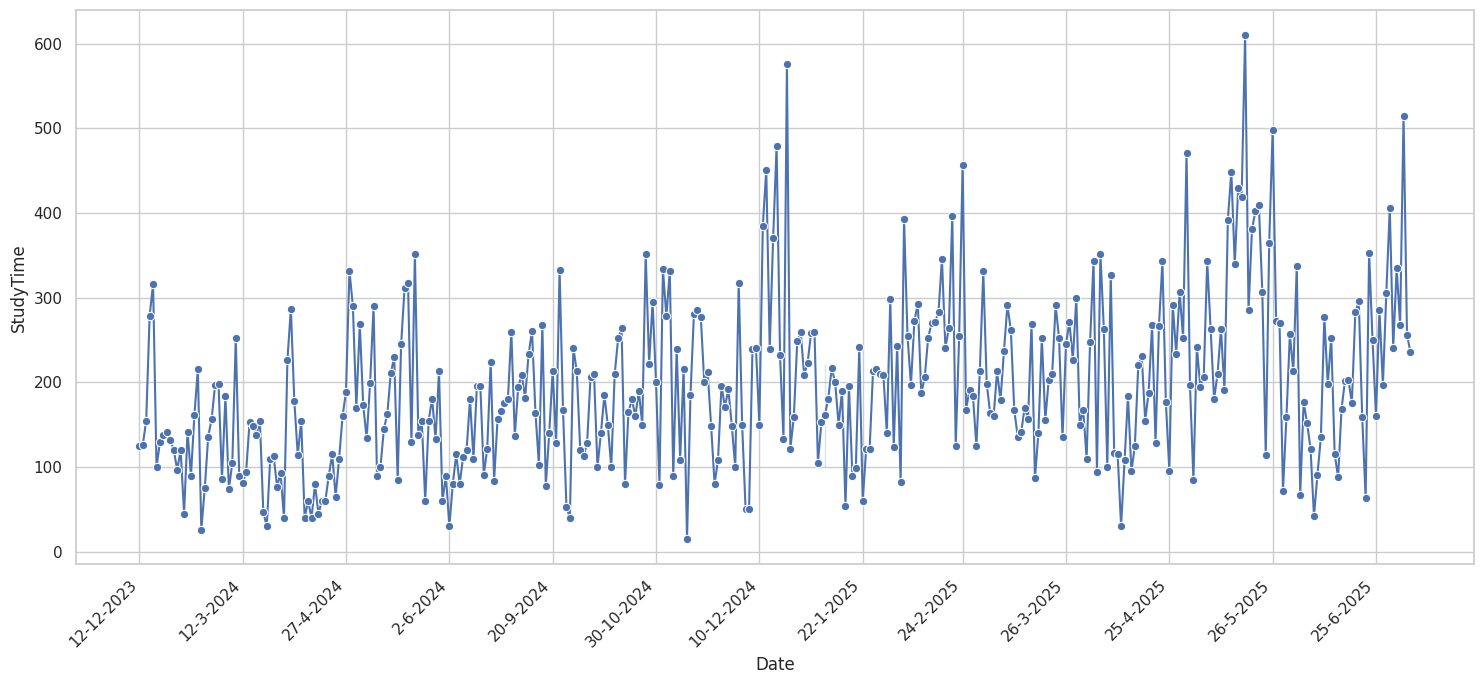

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 7))
sns.lineplot(x="Date", y="StudyTime", data=df, marker='o')
# Select every 30th date to display as a tick label
plt.xticks(df['Date'][::30], rotation=45, ha='right')
plt.tight_layout() # Adjust layout

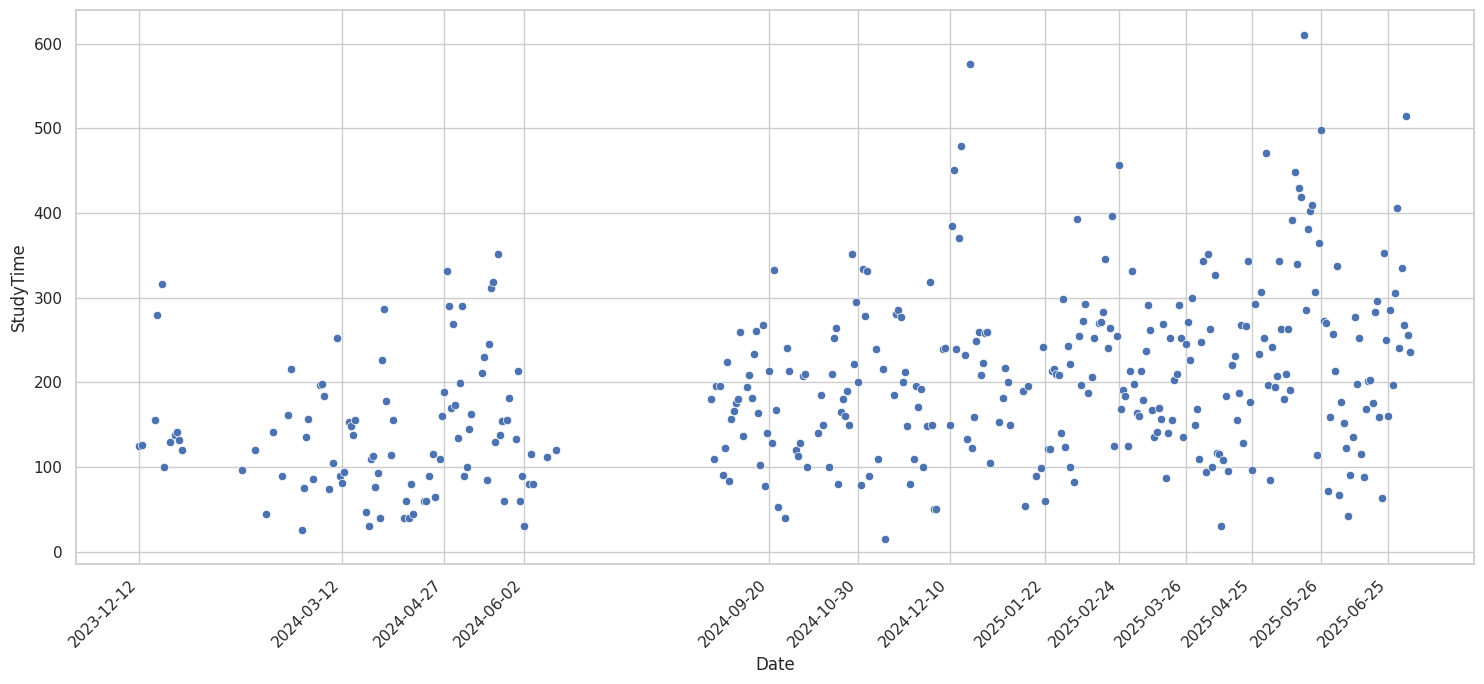

In [ ]:

plt.figure(figsize=(15, 7))
sns.scatterplot(x="Date", y="StudyTime", data=df)
plt.xticks(df['Date'][::30], rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
df["Date"] = pd.to_datetime(df["Date"], format="%d-%m-%Y", errors="coerce")


In [ ]:
df = df.dropna(subset=["Date"])

/tmp/ipython-input-41-1934316560.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Date_Ordinal"] = df["Date"].map(lambda x: x.toordinal())
/tmp/ipython-input-41-1934316560.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["BestFit"] = coeffs[0] * df["Date_Ordinal"] + coeffs[1]


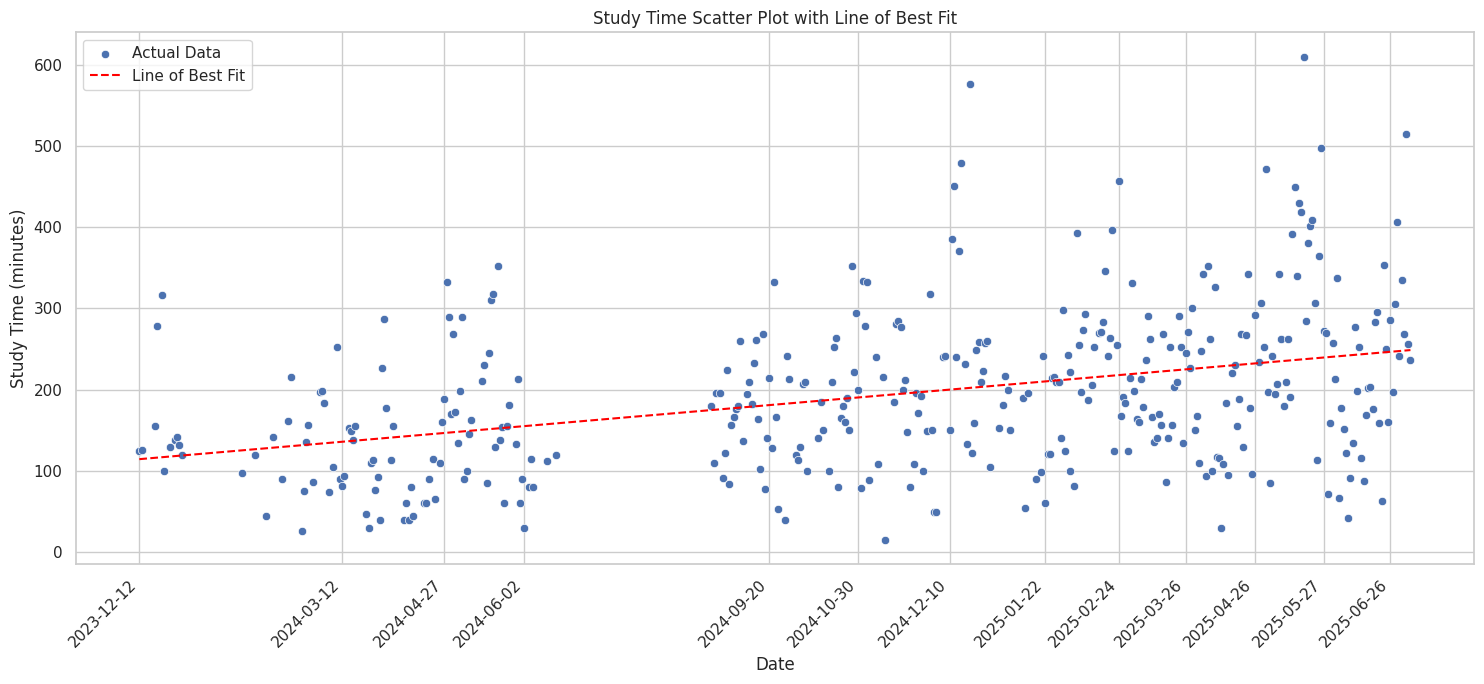

In [ ]:
df["Date_Ordinal"] = df["Date"].map(lambda x: x.toordinal())

# Fit regression line
coeffs = np.polyfit(df["Date_Ordinal"], df["StudyTime"], 1)
df["BestFit"] = coeffs[0] * df["Date_Ordinal"] + coeffs[1]

# Plot
plt.figure(figsize=(15, 7))
sns.scatterplot(x="Date", y="StudyTime", data=df, label="Actual Data")
plt.plot(df["Date"], df["BestFit"], color='red', linestyle='--', label="Line of Best Fit")
plt.xticks(df['Date'][::30], rotation=45, ha='right')
plt.xlabel("Date")
plt.ylabel("Study Time (minutes)")
plt.title("Study Time Scatter Plot with Line of Best Fit")
plt.legend()
plt.tight_layout()
plt.show()

/tmp/ipython-input-42-1364911862.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Month"] = df["Date"].dt.to_period("M").astype(str)
/tmp/ipython-input-42-1364911862.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Month", y="StudyTime", data=df, estimator="sum", ci=None)


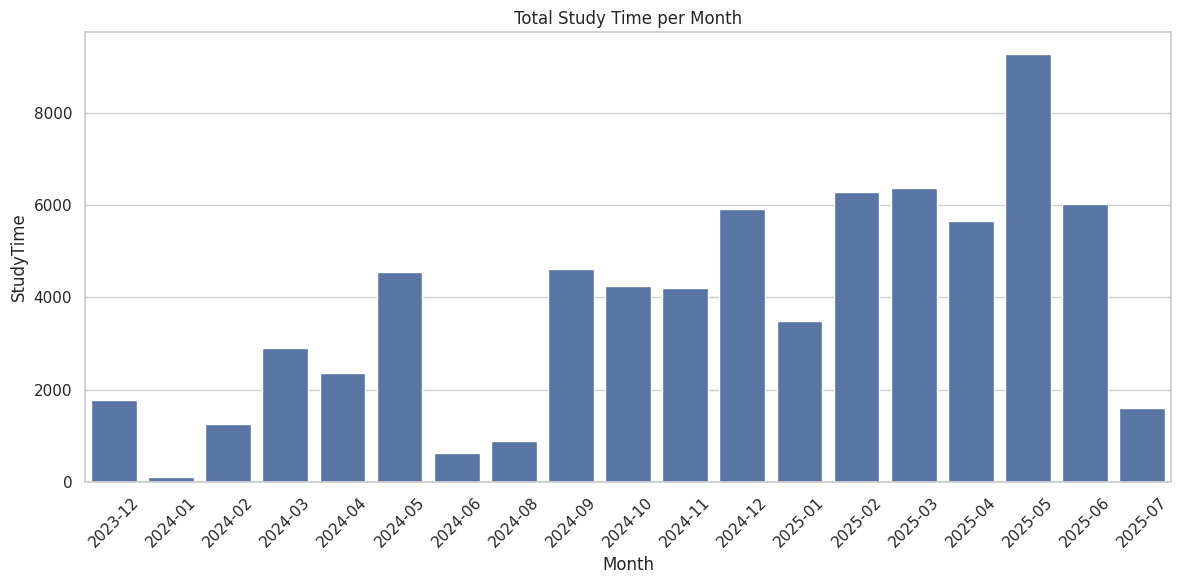

In [ ]:
df["Month"] = df["Date"].dt.to_period("M").astype(str)
plt.figure(figsize=(12, 6))
sns.barplot(x="Month", y="StudyTime", data=df, estimator="sum", ci=None)
plt.title("Total Study Time per Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipython-input-43-1474856911.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Day"] = df["Date"].dt.day
/tmp/ipython-input-43-1474856911.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Month"] = df["Date"].dt.month_name()


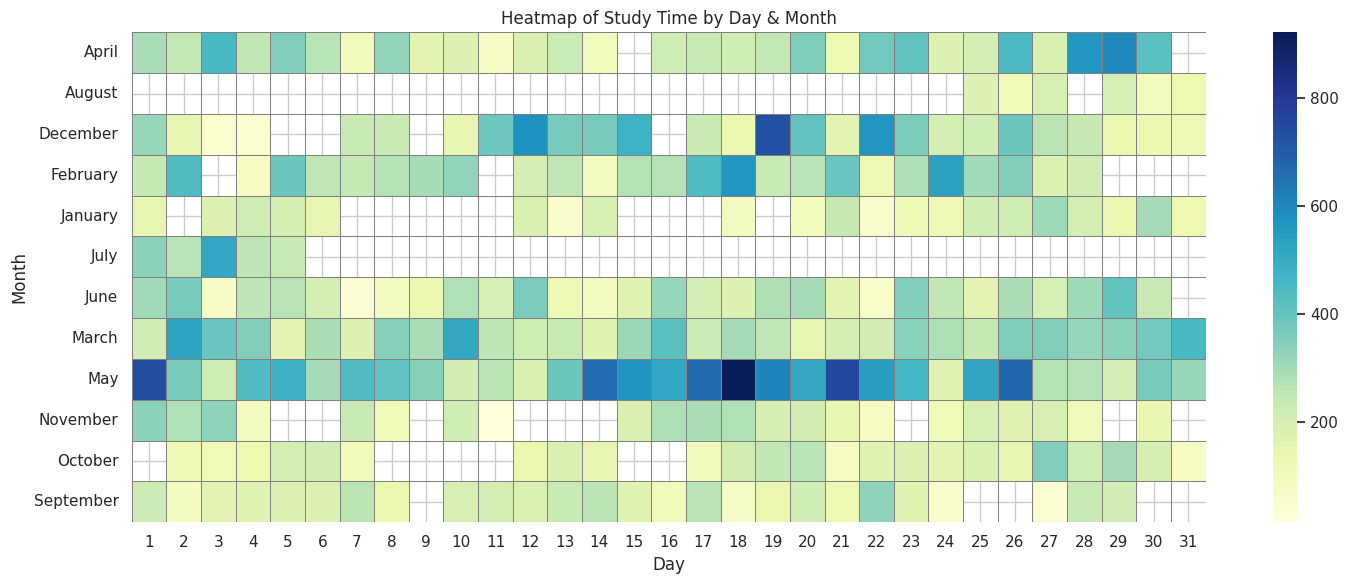

In [ ]:
###Heatmap
df["Day"] = df["Date"].dt.day
df["Month"] = df["Date"].dt.month_name()

pivot = df.pivot_table(index="Month", columns="Day", values="StudyTime", aggfunc="sum")
plt.figure(figsize=(15, 6))
sns.heatmap(pivot, cmap="YlGnBu", linewidths=0.5, linecolor="gray")
plt.title("Heatmap of Study Time by Day & Month")
plt.tight_layout()
plt.show()

/tmp/ipython-input-44-2377403832.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Cumulative"] = df["StudyTime"].cumsum()


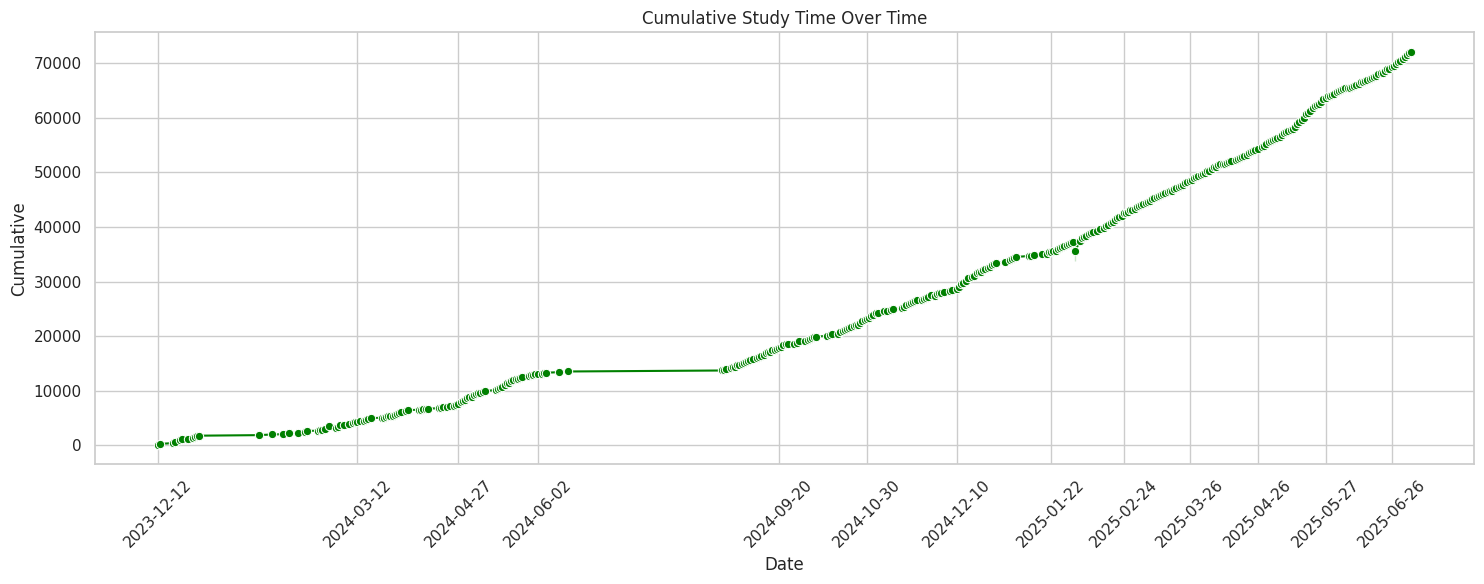

In [ ]:
df["Cumulative"] = df["StudyTime"].cumsum()
plt.figure(figsize=(15, 6))
sns.lineplot(x="Date", y="Cumulative", data=df, marker='o', color='green')
plt.title("Cumulative Study Time Over Time")
plt.xticks(df["Date"][::30], rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipython-input-45-3202671883.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["RollingAvg"] = df["StudyTime"].rolling(window=3).mean()


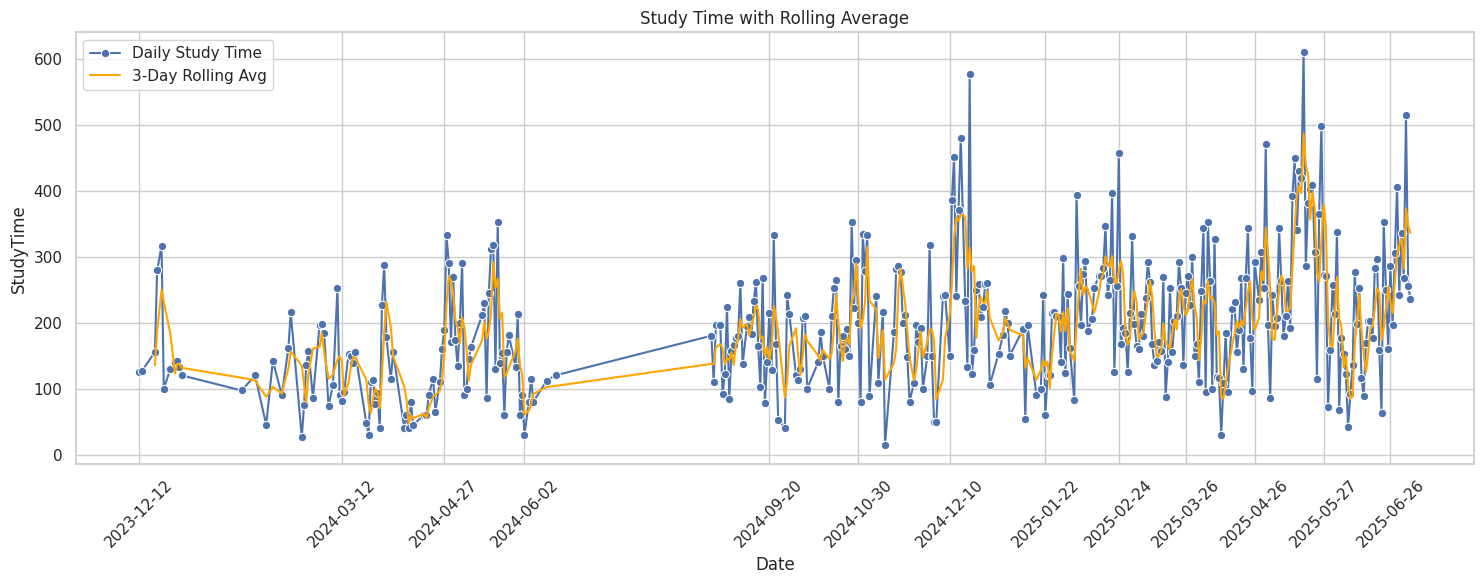

In [ ]:
df["RollingAvg"] = df["StudyTime"].rolling(window=3).mean()

plt.figure(figsize=(15, 6))
sns.lineplot(x="Date", y="StudyTime", data=df, label="Daily Study Time", marker='o')
sns.lineplot(x="Date", y="RollingAvg", data=df, label="3-Day Rolling Avg", color="orange")
plt.title("Study Time with Rolling Average")
plt.xticks(df["Date"][::30], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()